In [ ]:
import warnings
warnings.filterwarnings('ignore')                      #koi warnng msg aaye ti ignore krta hai
import pandas as pd                                    #use for manipulation and analysis
import re                                              # use for regular expression (text pattern matching aur manipulation)
import seaborn as sns                                  #data visualization library
from sklearn.feature_extraction.text import TfidfVectorizer #TfidfVectorizer ek text data ko numerical format mein convert karne ke liye use hota hai
import matplotlib.pyplot as plt                        # data visualization library helps to make graph and plots
from wordcloud import WordCloud                        # use for making word cloud( text data visually represent )

In [ ]:
import nltk                 #popular python library use for NLP taks.
nltk.download('stopwords')
from nltk.corpus import stopwords   # remove common words (in,the,is etc)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = pd.read_csv('/content/dreaddit-test.csv')
data.head()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1.514981e+09,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1.524517e+09,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1.524018e+09,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1.516200e+09,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667


In [ ]:
pd.unique(data['subreddit'])

array(['relationships', 'anxiety', 'ptsd', 'assistance', 'homeless',
       'almosthomeless', 'domesticviolence', 'survivorsofabuse', 'stress',
       'food_pantry'], dtype=object)

<Axes: xlabel='social_karma', ylabel='count'>

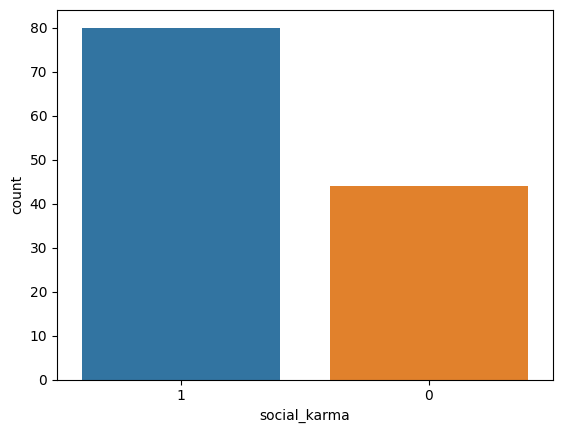

In [ ]:
sns.countplot(data=data,
              x='social_karma',
              order=data.label.value_counts().index)

In [ ]:
pos_neg=[]
for i in range(len(data['label'])):
           if data['label'][i] >=5:
                pos_neg.append(1)
           else:
              pos_neg.append(0)
data['label']=pos_neg

In [ ]:
from tqdm import tqdm

def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
      sentence = re.sub(r'[^\w\s]', '',sentence)

      preprocessed_text.append(' '.join(token.lower()
                                         for token in nltk.word_tokenize(sentence)
                                         if token.lower() not in stopwords.words('english')))

      return preprocessed_text


In [ ]:
pip install nltk


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd

# Define your preprocess_text function
def preprocess_text(text):
    # Replace '...' with your actual preprocessing logic
    preprocessed_text = text  # Replace with your preprocessing code
    return preprocessed_text

# Read the CSV file
data = pd.read_csv("dreaddit-test.csv")

# Apply the preprocess_text function to the 'text' column
data['text'] = data['text'].apply(preprocess_text)

# Save the modified data back to the same CSV file without the index column
data.to_csv("dreaddit-test.csv", index=False)


In [ ]:
data.head()


,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1.514981e+09,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1.524517e+09,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1.524018e+09,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1.516200e+09,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667


In [ ]:
data["subreddit"].value_counts()


anxiety             147
relationships       142
ptsd                127
domesticviolence     72
survivorsofabuse     70
assistance           66
homeless             52
almosthomeless       19
stress               14
food_pantry           6
Name: subreddit, dtype: int64

In [ ]:
consolidated = 'label'.join(
	word for word in data['label'][data['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=700,random_state=21, max_font_size=110)
plt.figure(figsize=(5,2))
# plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')

plt.axis('on')
plt.show()

In [ ]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['text'] ).toarray()


In [ ]:
X


array([[0.        , 0.        , 0.15557482, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.11921879, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
													test_size=0.33,
													stratify=data['label'],
													random_state = 42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

#testing the model
pred = model.predict(X_train)
print(confidence(y_train,pred))



NameError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# Testing the model on the training data to get probability estimates
probs = model.predict_proba(X_train)

# Calculate confidence scores for each prediction
text = np.max(probs, axis=1)

# Print the confidence scores
print(text)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [ ]:
from sklearn import metrics
cm = text(y_train,pred)

cm_display = metrics.ConfusionMatrixDisplay(text = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()


TypeError: ignored

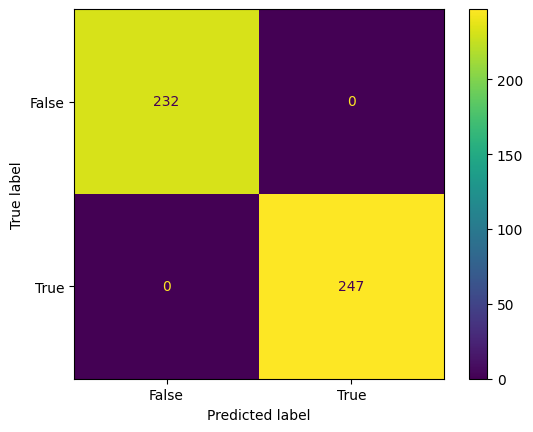

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming you already have y_train and pred defined

# Create a confusion matrix
cm = metrics.confusion_matrix(y_train, pred)

# Create a ConfusionMatrixDisplay object
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])

# Plot the confusion matrix
cm_display.plot()
plt.show()
